In [2]:
import os
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [3]:
save_path=r'D:\DL_DATA\ubfc_seg\lab\mask' ###where to save
data_path=r'D:\DL_DATA\ubfc_seg\lab\data'#### image path
cord_path=r'D:\DL_DATA\ubfc_seg\lab\cord'####cord path
dic_label={'forehead':1,'left_cheek':2,'right_cheek':3}

In [4]:
for dir in tqdm(os.listdir(data_path)):
    img_path=os.path.join(data_path,dir)
    img=cv2.imread(img_path)
    mask_path=os.path.join(cord_path,dir.split('.')[0]+'.json')
    with open(mask_path,'r') as f:
        data=json.load(f)
    data=data['shapes']
    mask=np.zeros((480,640))
    for i in range(len(data)):
        label=data[i]['label']
        points=data[i]['points']
        
        points=np.array(points).astype(np.int32)
        
        mask=cv2.fillPoly(mask,[points],dic_label[label])
        
        mask=np.uint8(mask)
    img=cv2.resize(img,(224,224))
    mask=cv2.resize(mask,(224,224))
    
    
    os.makedirs(os.path.join(save_path,'img'),exist_ok=True)
    os.makedirs(os.path.join(save_path,'mask'),exist_ok=True)
    
    cv2.imwrite(os.path.join(save_path,'img',dir),img)
    cv2.imwrite(os.path.join(save_path,'mask',dir.split('.')[0]+'.png'),mask)
    
        

  0%|          | 0/27 [00:00<?, ?it/s]

In [5]:
def all_files(path):
    files=[]
    img_path=os.path.join(path,'img')
    mask_path=os.path.join(path,'mask')
    for dir in os.listdir(img_path):
        full_img=os.path.join(img_path,dir)
        full_mask=os.path.join(mask_path,dir)
        files.append((full_img,full_mask))
    return files

In [6]:
files=all_files(r'D:\DL_DATA\ubfc_seg\lab\mask')
np.random.shuffle(files)

In [7]:
def visual_mask(mask):
    mask=np.uint8(mask*75)
    mask=cv2.cvtColor(mask,cv2.COLOR_BGR2GRAY)
    return mask

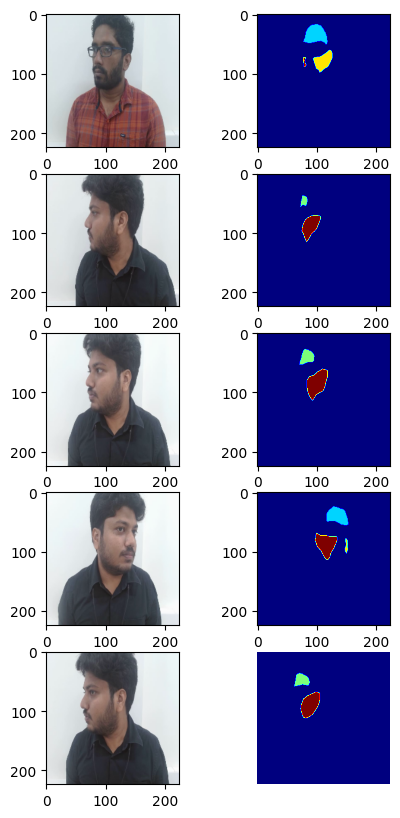

In [9]:
fig,axs=plt.subplots(5,2,figsize=(5,10))
for i in range(5):
    num=np.random.choice(range(0,len(files)))
    
    img=cv2.imread(files[num][0])
    mask=cv2.imread(files[num][1])
    view_mask=visual_mask(mask)
    
    
    axs[i][0].imshow(img[:,:,::-1])
    axs[i][1].imshow(view_mask,cmap='jet')
plt.axis('off')
plt.show()